In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv
import copy

In [0]:
#loading the dataset
dataset = pd.read_csv (r'Churn.csv')

#printing the dataset
#print(dataset)

#dataset info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [0]:
#printing the features of the dataset 
reader = csv.DictReader(open("Churn.csv"))
names=reader.fieldnames
names

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [0]:
#viewing the object type attributes of the dataset
datasetcopy=dataset
datasetcopy1=dataset.select_dtypes(include=['object']).copy()
datasetcopy1.head()

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
0,7590-VHVEG,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,5575-GNVDE,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,1889.5,No
2,3668-QPYBK,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,108.15,Yes
3,7795-CFOCW,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),1840.75,No
4,9237-HQITU,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,151.65,Yes


In [0]:
 #indicates there are no missing values row wise
print(datasetcopy.isnull().values.sum())

0


In [0]:
#indicates there are no missing values column wise
print(datasetcopy.isnull().sum()) 

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [0]:
#setting the object datatype as category datatype and converting them into categorical types for training
datasetcopy['gender'] = datasetcopy['gender'].astype('category')
datasetcopy['gender'] = datasetcopy['gender'].cat.codes

datasetcopy['Partner'] = datasetcopy['Partner'].astype('category')
datasetcopy['Partner'] = datasetcopy['Partner'].cat.codes

datasetcopy['Dependents'] = datasetcopy['Dependents'].astype('category')
datasetcopy['Dependents'] = datasetcopy['Dependents'].cat.codes

datasetcopy['PhoneService'] = datasetcopy['PhoneService'].astype('category')
datasetcopy['PhoneService'] = datasetcopy['PhoneService'].cat.codes

datasetcopy['MultipleLines'] = datasetcopy['MultipleLines'].astype('category')
datasetcopy['MultipleLines'] = datasetcopy['MultipleLines'].cat.codes

datasetcopy['InternetService'] = datasetcopy['InternetService'].astype('category')
datasetcopy['InternetService'] = datasetcopy['InternetService'].cat.codes

datasetcopy['OnlineSecurity'] = datasetcopy['OnlineSecurity'].astype('category')
datasetcopy['OnlineSecurity'] = datasetcopy['OnlineSecurity'].cat.codes

datasetcopy['OnlineBackup'] = datasetcopy['OnlineBackup'].astype('category')
datasetcopy['OnlineBackup'] = datasetcopy['OnlineBackup'].cat.codes

datasetcopy['DeviceProtection'] = datasetcopy['DeviceProtection'].astype('category')
datasetcopy['DeviceProtection'] = datasetcopy['DeviceProtection'].cat.codes

datasetcopy['TechSupport'] = datasetcopy['TechSupport'].astype('category')
datasetcopy['TechSupport'] = datasetcopy['TechSupport'].cat.codes

datasetcopy['StreamingTV'] = datasetcopy['StreamingTV'].astype('category')
datasetcopy['StreamingTV'] = datasetcopy['StreamingTV'].cat.codes

datasetcopy['StreamingMovies'] = datasetcopy['StreamingMovies'].astype('category')
datasetcopy['StreamingMovies'] = datasetcopy['StreamingMovies'].cat.codes

datasetcopy['Contract'] = datasetcopy['Contract'].astype('category')
datasetcopy['Contract'] = datasetcopy['Contract'].cat.codes

datasetcopy['PaperlessBilling'] = datasetcopy['PaperlessBilling'].astype('category')
datasetcopy['PaperlessBilling'] = datasetcopy['PaperlessBilling'].cat.codes

datasetcopy['PaymentMethod'] = datasetcopy['PaymentMethod'].astype('category')
datasetcopy['PaymentMethod'] = datasetcopy['PaymentMethod'].cat.codes

#datasetcopy['Churn'] = datasetcopy['Churn'].astype('category')
#datasetcopy['Churn'] = datasetcopy['Churn'].cat.codes

In [0]:
#printing after converting objects into categorical types
datasetcopy.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,No
1,5575-GNVDE,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.5,No
2,3668-QPYBK,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,Yes
3,7795-CFOCW,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,No
4,9237-HQITU,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,Yes


In [0]:
#printing dtype of column TotalCharges
print(datasetcopy['TotalCharges'].dtypes)

object


In [0]:
#converting the datatype of column TotalCharges into 'float32' type
datasetcopy["TotalCharges"] = pd.to_numeric(datasetcopy["TotalCharges"],errors='coerce')
datasetcopy["TotalCharges"] = datasetcopy["TotalCharges"].astype('float32')

In [0]:
#dataset info
datasetcopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null int8
SeniorCitizen       7043 non-null int64
Partner             7043 non-null int8
Dependents          7043 non-null int8
tenure              7043 non-null int64
PhoneService        7043 non-null int8
MultipleLines       7043 non-null int8
InternetService     7043 non-null int8
OnlineSecurity      7043 non-null int8
OnlineBackup        7043 non-null int8
DeviceProtection    7043 non-null int8
TechSupport         7043 non-null int8
StreamingTV         7043 non-null int8
StreamingMovies     7043 non-null int8
Contract            7043 non-null int8
PaperlessBilling    7043 non-null int8
PaymentMethod       7043 non-null int8
MonthlyCharges      7043 non-null float64
TotalCharges        7032 non-null float32
Churn               7043 non-null object
dtypes: float32(1), float64(1), int64(2), int8(15), object(2)


In [0]:
#filling out the nan values/infinite values and very long values 
datasetcopy['TotalCharges'] = np.nan_to_num(datasetcopy['TotalCharges'])
datasetcopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null int8
SeniorCitizen       7043 non-null int64
Partner             7043 non-null int8
Dependents          7043 non-null int8
tenure              7043 non-null int64
PhoneService        7043 non-null int8
MultipleLines       7043 non-null int8
InternetService     7043 non-null int8
OnlineSecurity      7043 non-null int8
OnlineBackup        7043 non-null int8
DeviceProtection    7043 non-null int8
TechSupport         7043 non-null int8
StreamingTV         7043 non-null int8
StreamingMovies     7043 non-null int8
Contract            7043 non-null int8
PaperlessBilling    7043 non-null int8
PaymentMethod       7043 non-null int8
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null float32
Churn               7043 non-null object
dtypes: float32(1), float64(1), int64(2), int8(15), object(2)


In [0]:
#normalization
from sklearn import preprocessing

#normalizing the column 'tenure'
x = datasetcopy[['tenure']].values.astype(int)
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
datasetcopy['tenure'] = pd.DataFrame(x_scaled)

#normalizing the column 'Monthly Charges'
x = datasetcopy[['MonthlyCharges']].values.astype(int)
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
datasetcopy['MonthlyCharges'] = pd.DataFrame(x_scaled)

#normalizing the column 'Total Charges'
x = datasetcopy[['TotalCharges']].values.astype(int)
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
datasetcopy['TotalCharges'] = pd.DataFrame(x_scaled)

In [0]:
#printing the entire dataset
datasetcopy

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,0.013889,0,1,0,0,2,0,0,0,0,0,1,2,0.11,0.003339,No
1,5575-GNVDE,1,0,0,0,0.472222,1,0,0,2,0,2,0,0,0,1,0,3,0.38,0.217526,No
2,3668-QPYBK,1,0,0,0,0.027778,1,0,0,2,2,0,0,0,0,0,1,3,0.35,0.012437,Yes
3,7795-CFOCW,1,0,0,0,0.625000,0,1,0,2,0,2,2,0,0,1,0,0,0.24,0.211884,No
4,9237-HQITU,0,0,0,0,0.027778,1,0,1,0,0,0,0,0,0,0,1,2,0.52,0.017388,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,1,0,1,1,0.333333,1,2,0,2,0,2,2,2,2,1,1,3,0.66,0.229157,No
7039,2234-XADUH,0,0,1,1,1.000000,1,2,1,0,2,2,0,2,2,1,1,1,0.85,0.847766,No
7040,4801-JZAZL,0,0,1,1,0.152778,0,1,0,2,0,0,0,0,0,0,1,2,0.11,0.039843,No
7041,8361-LTMKD,1,1,1,0,0.055556,1,2,1,0,0,0,0,0,0,0,1,3,0.56,0.035237,Yes


In [0]:
#printing the dataset info
datasetcopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null int8
SeniorCitizen       7043 non-null int64
Partner             7043 non-null int8
Dependents          7043 non-null int8
tenure              7043 non-null float64
PhoneService        7043 non-null int8
MultipleLines       7043 non-null int8
InternetService     7043 non-null int8
OnlineSecurity      7043 non-null int8
OnlineBackup        7043 non-null int8
DeviceProtection    7043 non-null int8
TechSupport         7043 non-null int8
StreamingTV         7043 non-null int8
StreamingMovies     7043 non-null int8
Contract            7043 non-null int8
PaperlessBilling    7043 non-null int8
PaymentMethod       7043 non-null int8
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null float64
Churn               7043 non-null object
dtypes: float64(3), int64(1), int8(15), object(2)
memory usa

In [0]:
#splitting the attributes and labels 
X = datasetcopy.iloc[:, 1:-1].values  #attributes
y = datasetcopy.iloc[:, -1].values  #labels

#printing the shape of X and y
print(X.data.shape,y.data.shape)

(7043, 19) (7043,)


In [0]:
# splits the dataset into 80% train data and 20% test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [0]:
#fitting the train set
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

#scale the features so that all of them can be uniformly evaluated
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [0]:
#knn classifier is applied here to training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [0]:
y_pred = classifier.predict(X_test)

In [0]:
#evaluating using confusion matrix, precision, recall and f1 score are the most commonly used metrics
from sklearn.metrics import classification_report, confusion_matrix

label=['Customer did not churn, Customer churned']
print("\n\nCONFUSION MATRIX:\n ")
print(confusion_matrix(y_test, y_pred))

print("------------------------------------------------------------------")
#The reported averages include macro average 
#(averaging the unweighted mean per label), weighted average
# (averaging the support-weighted mean per label), sample average 
#(only for multilabel classification) and micro average 
#(averaging the total true positives, false negatives and false positives)
# it is only shown for multi-label or multi-class with a subset of classes
# because it is accuracy otherwise.

print("\n CLASSIFICATION REPORT:\n ")
print(classification_report(y_test, y_pred,target_names=['Customers did not churn','Customers churned']))





CONFUSION MATRIX:
 
[[870 160]
 [206 173]]
------------------------------------------------------------------

 CLASSIFICATION REPORT:
 
                         precision    recall  f1-score   support

Customers did not churn       0.81      0.84      0.83      1030
      Customers churned       0.52      0.46      0.49       379

               accuracy                           0.74      1409
              macro avg       0.66      0.65      0.66      1409
           weighted avg       0.73      0.74      0.73      1409



In [0]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

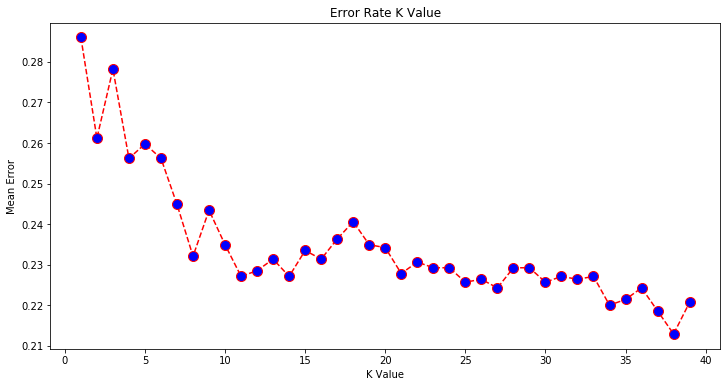

In [0]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [0]:
df=datasetcopy.iloc[:,1:20]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa4dea89ba8>,
      dtype=object)

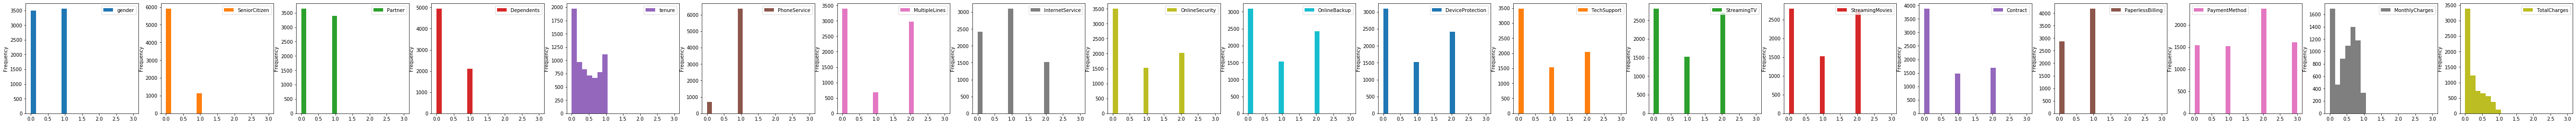

In [0]:
df.plot.hist(subplots=True, layout=(20,20), figsize=(100, 100), bins=20)

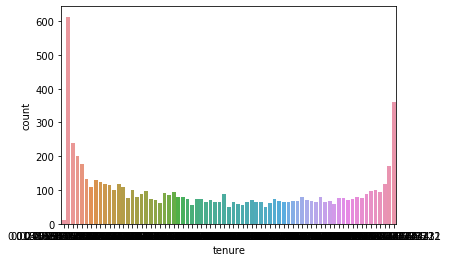

In [0]:
import seaborn as sns
sns.countplot(datasetcopy['tenure'])

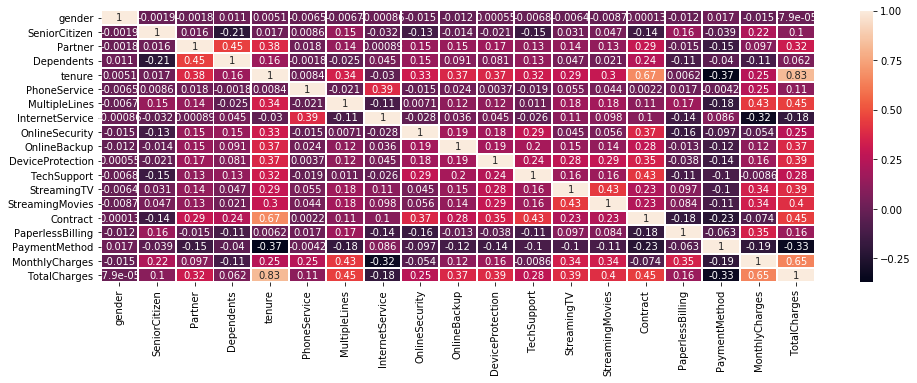

In [0]:
plt.figure(figsize = (16,5))
sns.heatmap(df.corr(), annot=True,linewidths=.9)

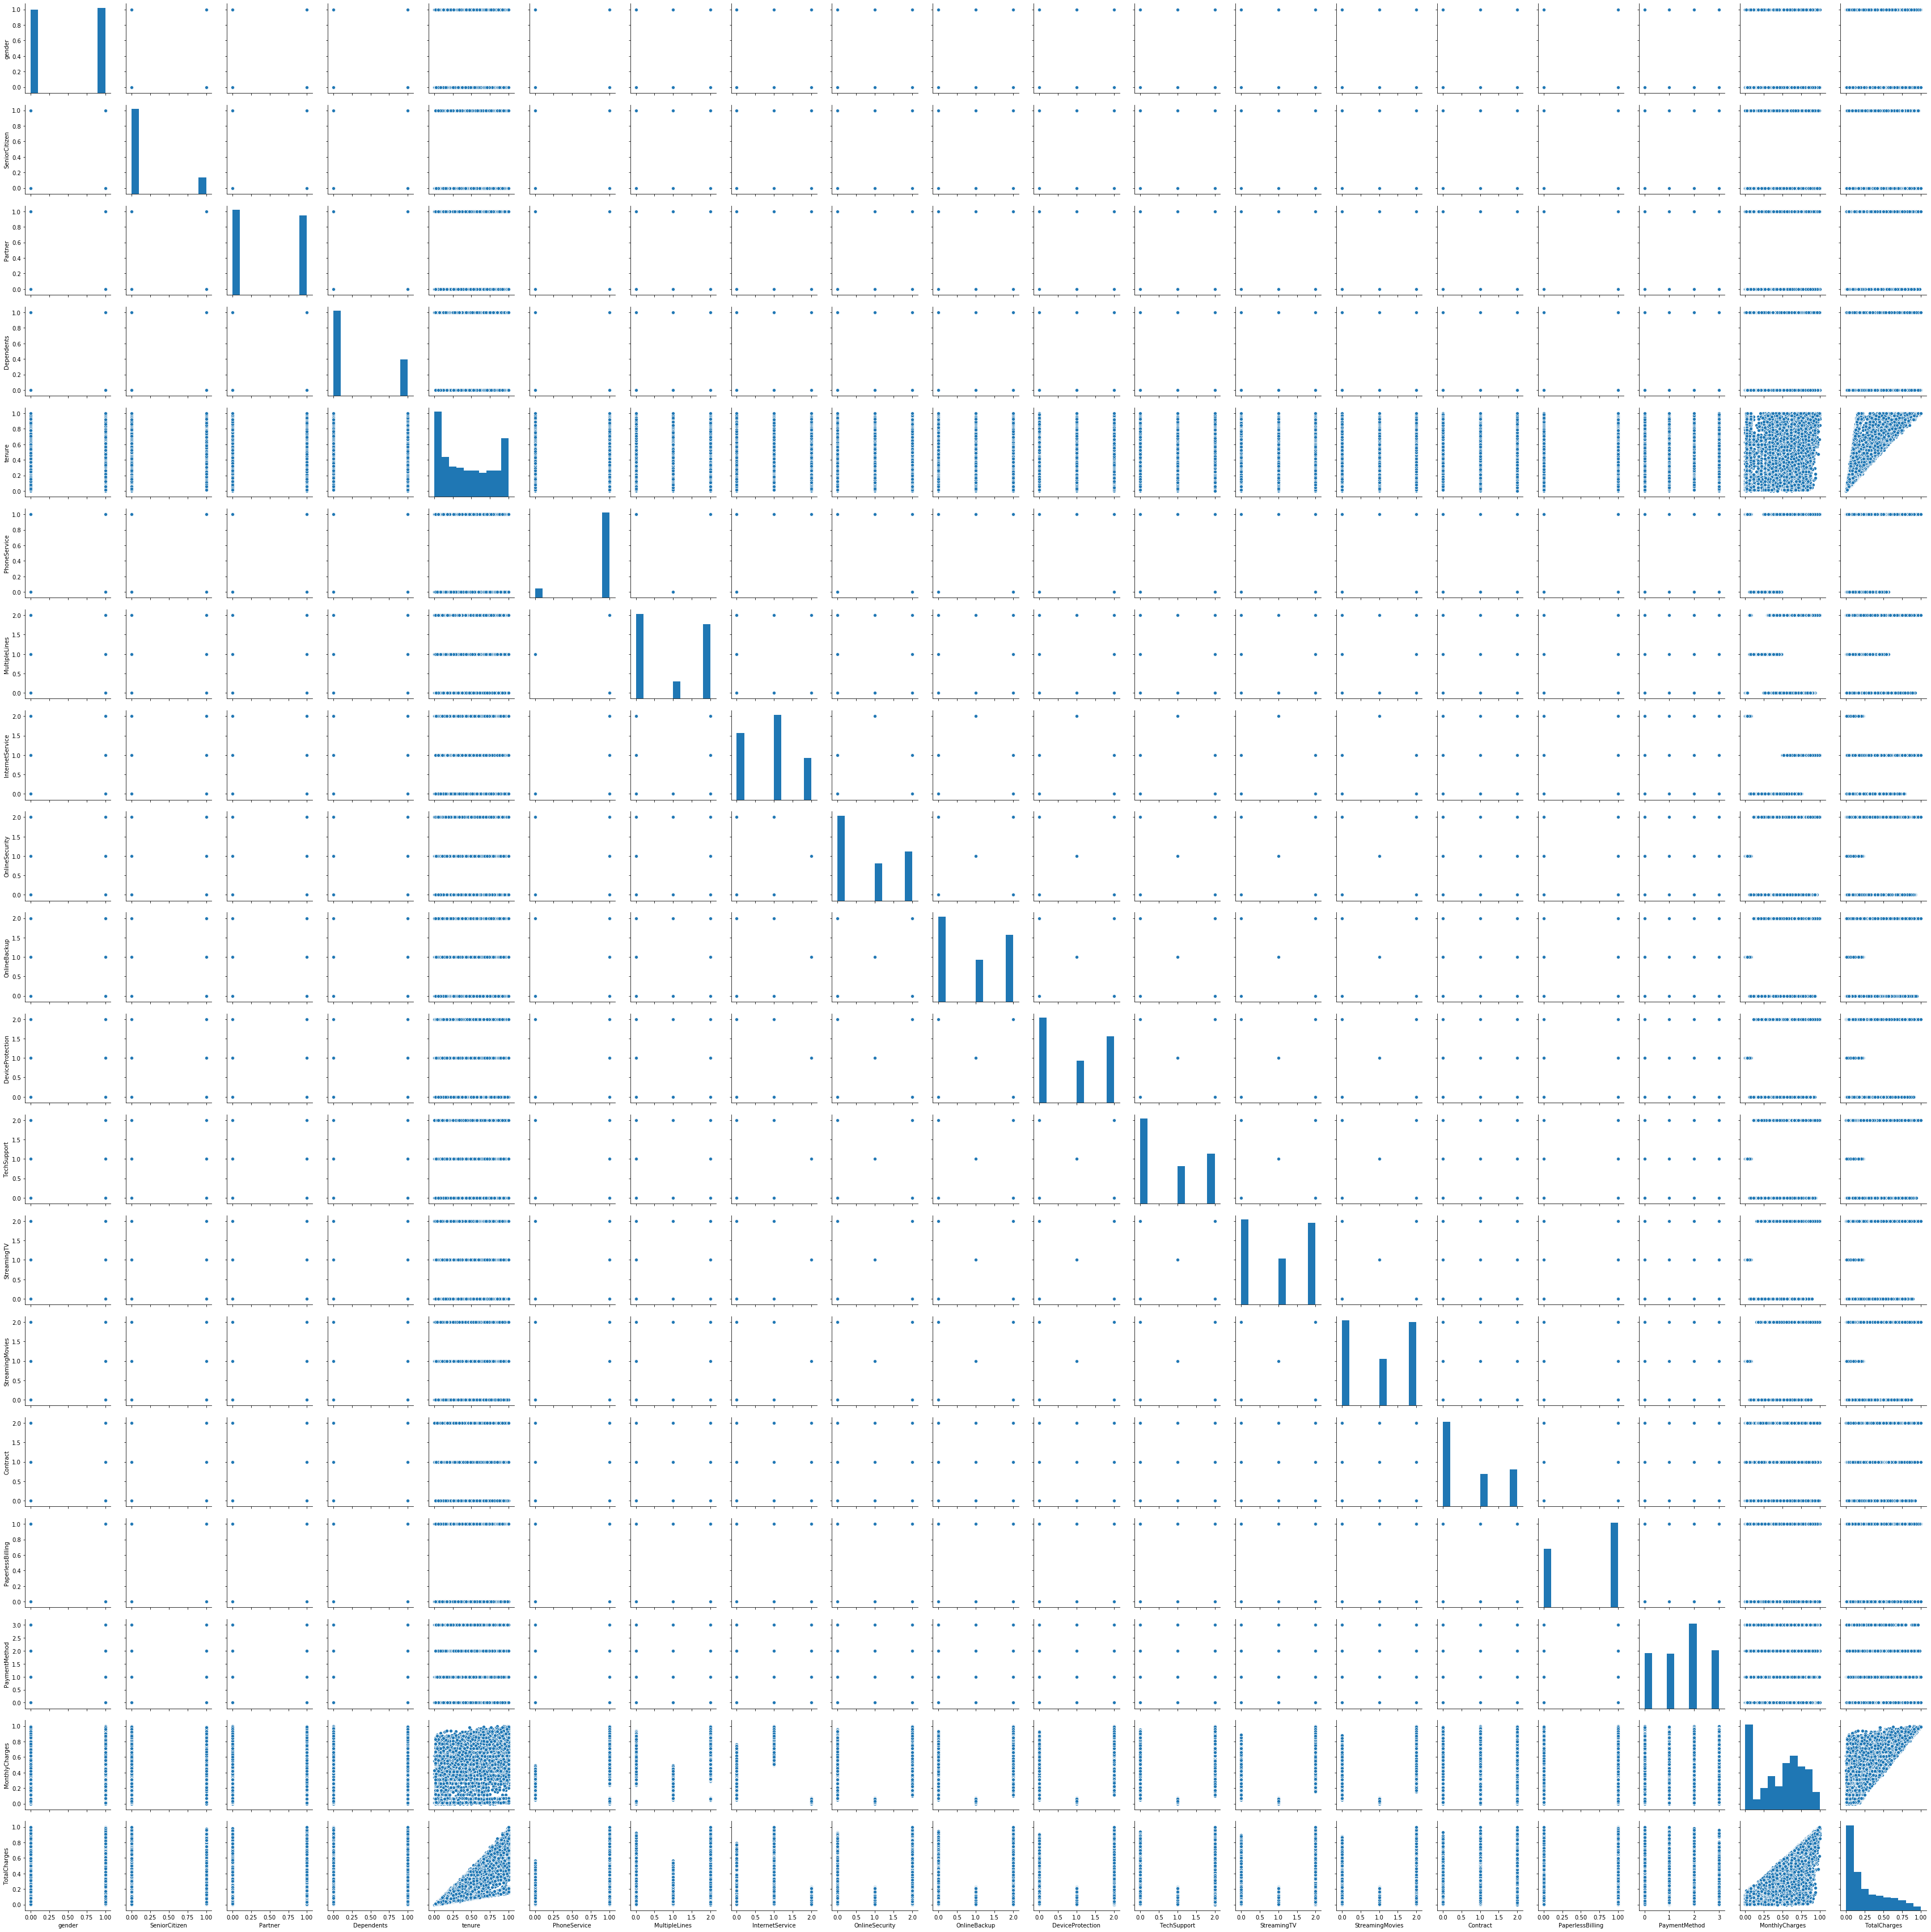

In [0]:
sns.pairplot(datasetcopy)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  after removing the cwd from sys.path.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa4cafc9c50>,
      dtype=object)

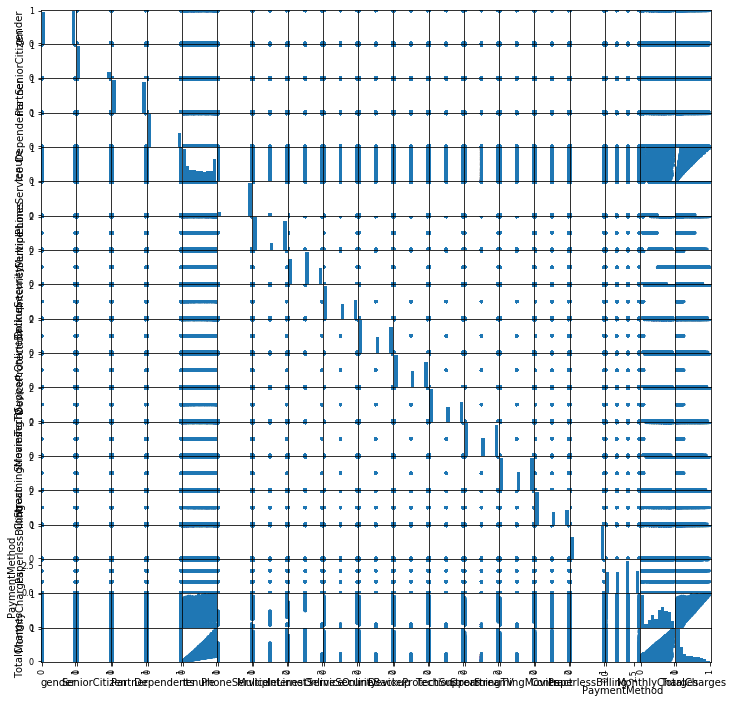

In [0]:
from pandas.plotting import scatter_matrix

fig, ax = plt.subplots(figsize=(12,12))
scatter_matrix(datasetcopy, alpha=1, ax=ax)